In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
all_data = pd.read_csv('dataset.csv')

In [3]:
test_data = all_data.loc[all_data.year == 2020]
train_data = all_data.loc[all_data.year < 2020]

# Break it into train and test data
X_train = train_data.loc[:, [
    "race_1", "race_2", "race_3", "race_4", "last_year_tot", 
    "last_year_avg", "last_year_std", "same_race_last_year"
]]
y_train = train_data.loc[:, "score"]
X_test  = test_data.loc[:, [
    "race_1", "race_2", "race_3", "race_4", "last_year_tot", 
    "last_year_avg", "last_year_std", "same_race_last_year"
]]
y_test = test_data.loc[:, "score"]

In [16]:
model = xgb.XGBRegressor(verbosity=1)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [34]:
y_pred = model.predict(X_test)
test_data["Prediction"] = y_pred

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root mean squared error:", rmse)

Root mean squared error: 7.687710836751316


/Users/trent.woodbury/Code/venvs/f1/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
<ipython-input-34-d5da56e9373b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Prediction"] = y_pred.copy()


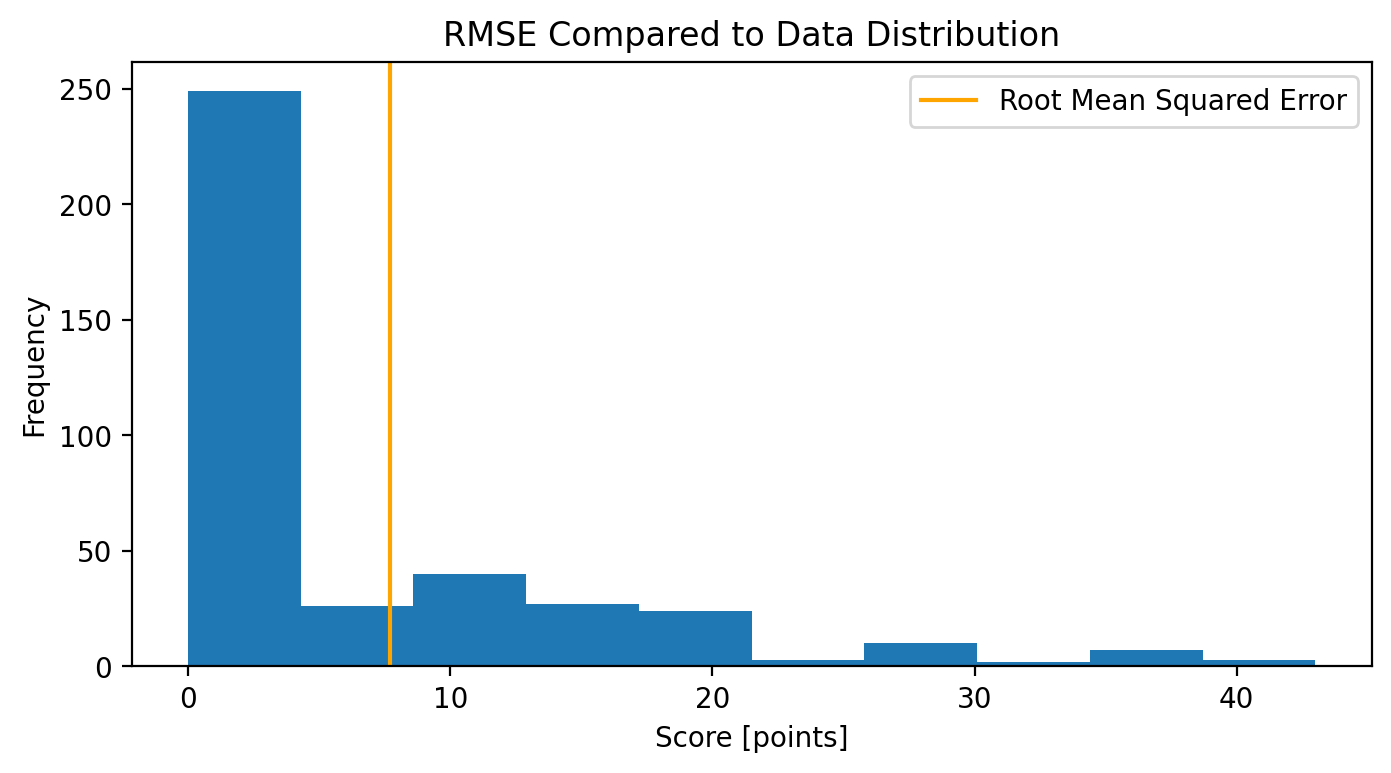

In [32]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (8,4)

plt.hist(y_test)
plt.axvline(rmse, color="orange", label="Root Mean Squared Error")
plt.xlabel("Score [points]")
plt.ylabel("Frequency")
plt.legend()
plt.title("RMSE Compared to Data Distribution")
plt.show()

In [38]:
test_data.sample(30)

,driver,race,race_1,race_2,race_3,race_4,last_year_tot,last_year_avg,last_year_std,same_race_last_year,score,year,Prediction
1614,Antonio Giovinazzi,HUN,0,5,0,3,26.0,1.238095,2.527939,0.0,0,2020,2.191139
1710,Jack Aitken,TUR,0,0,0,0,NaN,NaN,NaN,NaN,0,2020,0.580288
1408,Daniel Ricciardo,AUT,14,10,9,4,77.0,3.666667,5.782156,3.0,0,2020,0.995782
1554,Sebastian Vettel,EIF,0,1,0,3,304.0,14.476190,9.790909,NaN,0,2020,22.572124
1564,Daniil Kvyat,GBR,3,4,0,0,55.0,2.619048,4.283412,2.0,0,2020,0.718395
1470,Charles Leclerc,POR,9,11,7,0,377.0,17.952381,11.825719,NaN,15,2020,14.747935
1570,Daniil Kvyat,RUS,9,2,0,0,55.0,2.619048,4.283412,3.0,7,2020,1.950796
1576,Daniil Kvyat,SKH,0,3,15,0,55.0,2.619048,4.283412,NaN,9,2020,5.821272
1671,Kevin Magnussen,TUS,0,0,3,0,58.0,2.761905,2.998412,NaN,0,2020,1.004835
1626,Antonio Giovinazzi,BHR,0,1,0,4,26.0,1.238095,2.527939,0.0,0,2020,8.413169
